In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.shape

(1460, 81)

In [5]:
test.shape

(1459, 80)

In [6]:
train.drop(train[(train["GrLivArea"]>4000)&(train["SalePrice"]<300000)].index,inplace=True)

In [7]:
SalePrice = train[['Id','SalePrice']]

In [8]:
train = train.drop('SalePrice',axis = 1)
train.drop('Id',axis = 1, inplace = True)
test_Id = test['Id']
test.drop('Id',axis = 1, inplace = True)

In [9]:
all_data = pd.concat((train,test)).reset_index(drop = True)

In [10]:
all_data.shape

(2917, 79)

In [11]:
all_data.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal


# Missing Data Cleaning 
### Filled missing value with potential value like 'NA' or mean value

In [11]:
all_data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis = 1,inplace = True)

In [13]:
all_data_missing_ratio = all_data.isnull().sum()/ all_data.count() * 100
all_data_missing_ratio = all_data_missing_ratio.sort_values(ascending = False)
all_data_missing_ratio.head(10)

PoolQC          32311.111111
MiscFeature      2678.095238
Alley            1373.232323
Fence             410.858144
FireplaceQu        94.856379
LotFrontage        19.991773
GarageCond          5.765047
GarageQual          5.765047
GarageYrBlt         5.765047
GarageFinish        5.765047
dtype: float64

In [14]:
all_data['LotFrontage'] = all_data['LotFrontage'].fillna(all_data['LotFrontage'].mode()[0])

In [15]:
all_data['GarageFinish'] =all_data['GarageFinish'].fillna('NA')

In [16]:
all_data['GarageType'] = all_data['GarageType'].fillna('NA')

In [17]:
all_data['GarageCond'] = all_data['GarageCond'].fillna('NA')

In [18]:
all_data['GarageQual'] = all_data['GarageQual'].fillna('NA')

In [19]:
all_data['BsmtFinType2'] = all_data['BsmtFinType2'].fillna('NA')

In [20]:
all_data['BsmtExposure'] = all_data['BsmtExposure'].fillna('NA')

In [21]:
all_data['BsmtQual'] = all_data['BsmtQual'].fillna('NA')

In [22]:
all_data['BsmtCond'] = all_data['BsmtCond'].fillna('NA')

In [23]:
all_data['BsmtFinType1'] = all_data['BsmtFinType1'].fillna('NA')

In [24]:
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)

In [25]:
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')

In [26]:
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(all_data['YearBuilt'])

In [27]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [28]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [29]:
all_data['Functional'] = all_data['Functional'].fillna(all_data['Functional'].mode()[0])

In [30]:
all_data['BsmtFullBath'] =all_data['BsmtFullBath'].fillna(0)

In [31]:
all_data['BsmtHalfBath'] = all_data['BsmtHalfBath'].fillna(0)

In [32]:
all_data['Utilities'] = 'AllPub'

In [33]:
all_data['GarageArea'] = all_data['GarageArea'].fillna(all_data['GarageArea'].mode()[0])

In [34]:
all_data['GarageCars'] = all_data['GarageCars'].fillna(all_data['GarageCars'].mode()[0])

In [35]:
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].fillna(0)

In [36]:
all_data['BsmtFinSF1'] = all_data['BsmtFinSF1'].fillna(0)

In [37]:
all_data['BsmtFinSF2'] = all_data['BsmtFinSF2'].fillna(0)

In [38]:
all_data['BsmtUnfSF'] = all_data['BsmtUnfSF'].fillna(0)

In [39]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [40]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])

In [41]:
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna('Other')

In [42]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [48]:
all_data_missing_ratio = all_data.isnull().sum()/ all_data.count() * 100
all_data_missing_ratio = all_data_missing_ratio.sort_values(ascending = False)
all_data_missing_ratio.head(10)

PoolQC          32311.111111
MiscFeature      2678.095238
Alley            1373.232323
Fence             410.858144
FireplaceQu        94.856379
ExterQual           0.000000
YearRemodAdd        0.000000
RoofStyle           0.000000
RoofMatl            0.000000
Exterior1st         0.000000
dtype: float64

#  Feature Engineering

Convert some numerical features into categorical features. This made it easier to use labelencoder and get_dummies

In [49]:
Numerical_feat = ["MSSubClass","BsmtFullBath","BsmtHalfBath","HalfBath",
                  "BedroomAbvGr","KitchenAbvGr","MoSold","YrSold","YearBuilt",
                  "YearRemodAdd","LowQualFinSF","GarageYrBlt"]
for col in Numerical_feat:
    all_data[col]=all_data[col].astype(str)

Mapping values into levels. The data could be more linear. The level classification is based on the mean and medain value of each categorical value of a column

In [50]:
def map_values():
    all_data["mMSSubClass"] = all_data.MSSubClass.map({'180':1, 
                                        '30':2, '45':2, 
                                        '190':3, '50':3, '90':3, 
                                        '85':4, '40':4, '160':4, 
                                        '70':5, '20':5, '75':5, '80':5, '150':5,
                                        '120': 6, '60':6})
    
    all_data["mMSZoning"] = all_data.MSZoning.map({'C (all)':1, 'RH':2, 'RM':2, 'RL':3, 'FV':4})
    
    all_data["mNeighborhood"] = all_data.Neighborhood.map({'MeadowV':1,
                                               'IDOTRR':2, 'BrDale':2,
                                               'OldTown':3, 'Edwards':3, 'BrkSide':3,
                                               'Sawyer':4, 'Blueste':4, 'SWISU':4, 'NAmes':4,
                                               'NPkVill':5, 'Mitchel':5,
                                               'SawyerW':6, 'Gilbert':6, 'NWAmes':6,
                                               'Blmngtn':7, 'CollgCr':7, 'ClearCr':7, 'Crawfor':7,
                                               'Veenker':8, 'Somerst':8, 'Timber':8,
                                               'StoneBr':9,
                                               'NoRidge':10, 'NridgHt':10})
    
    all_data["mCondition1"] = all_data.Condition1.map({'Artery':1,
                                           'Feedr':2, 'RRAe':2,
                                           'Norm':3, 'RRAn':3,
                                           'PosN':4, 'RRNe':4,
                                           'PosA':5 ,'RRNn':5})
    
    all_data["mBldgType"] = all_data.BldgType.map({'2fmCon':1, 'Duplex':1, 'Twnhs':1, '1Fam':2, 'TwnhsE':2})
    
    all_data["mHouseStyle"] = all_data.HouseStyle.map({'1.5Unf':1, 
                                           '1.5Fin':2, '2.5Unf':2, 'SFoyer':2, 
                                           '1Story':3, 'SLvl':3,
                                           '2Story':4, '2.5Fin':4})
    
    all_data["mExterior1st"] = all_data.Exterior1st.map({'BrkComm':1,
                                             'AsphShn':2, 'CBlock':2, 'AsbShng':2,
                                             'WdShing':3, 'Wd Sdng':3, 'MetalSd':3, 'Stucco':3, 'HdBoard':3,
                                             'BrkFace':4, 'Plywood':4,
                                             'VinylSd':5,
                                             'CemntBd':6,
                                             'Stone':7, 'ImStucc':7})
    
    all_data["mMasVnrType"] = all_data.MasVnrType.map({'BrkCmn':1, 'None':1, 'BrkFace':2, 'Stone':3})
    
    all_data["mExterQual"] = all_data.ExterQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
    
    all_data["mFoundation"] = all_data.Foundation.map({'Slab':1, 
                                           'BrkTil':2, 'CBlock':2, 'Stone':2,
                                           'Wood':3, 'PConc':4})
    
    all_data["mBsmtQual"] = all_data.BsmtQual.map({'Fa':3, 'NA':1, 'TA':4, 'Gd':5, 'Ex':6,'Po':2})
    
    all_data["mBsmtExposure"] = all_data.BsmtExposure.map({'NA':1, 'No':2, 'Av':3, 'Mn':3, 'Gd':4})
    
    all_data["mHeating"] = all_data.Heating.map({'Floor':1, 'Grav':1, 'Wall':2, 'OthW':3, 'GasW':4, 'GasA':5})
    
    all_data["mHeatingQC"] = all_data.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    
    all_data["mKitchenQual"] = all_data.KitchenQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
    
    all_data["mFunctional"] = all_data.Functional.map({'Maj2':1, 'Maj1':2, 'Min1':2, 'Min2':2, 'Mod':2, 'Sev':2, 'Typ':3})
    
    all_data["mGarageType"] = all_data.GarageType.map({'CarPort':1, 'NA':1,
                                           'Detchd':2,
                                           '2Types':3, 'Basment':3,
                                           'Attchd':4, 'BuiltIn':5})
    
    all_data["mGarageFinish"] = all_data.GarageFinish.map({'NA':1, 'Unf':2, 'RFn':3, 'Fin':4})
    
    all_data["mPavedDrive"] = all_data.PavedDrive.map({'N':1, 'P':2, 'Y':3})
    
    all_data["mSaleType"] = all_data.SaleType.map({'COD':1, 'ConLD':1, 'ConLI':1, 'ConLw':1, 'Oth':1, 'WD':1,
                                       'CWD':2, 'Con':3, 'New':3})
    
    all_data["mSaleCondition"] = all_data.SaleCondition.map({'AdjLand':1, 'Abnorml':2, 'Alloca':2, 'Family':2, 'Normal':3, 'Partial':4})            
                
                        
                        
    
    return "Done!"

In [51]:
map_values()

'Done!'

### Pipeline and LabelEncoding 

Using LabelEncoding to label those 'year' features
Using log1p to the skewed features
then get_dummies to all features

In [52]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin,clone
from scipy import stats
from scipy.stats import skew
from sklearn.preprocessing import RobustScaler

In [53]:
class LabelEnc(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,y = None):
        return self
    def transform(self,X):
        label = LabelEncoder()
        X['YearBuilt'] = label.fit_transform(X['YearBuilt'])
        X['YearRemodAdd'] = label.fit_transform(X['YearRemodAdd'])
        X['GarageYrBlt'] = label.fit_transform(X['GarageYrBlt'])
        return X
    


In [54]:
class skew_dummies(BaseEstimator, TransformerMixin):
    def __init__(self,skew=0.5):
        self.skew = skew
    
    def fit(self,X,y=None):
        return self

    def transform(self,X):
        X_numeric = X.select_dtypes(exclude=["object"])
        skewness = X_numeric.apply(lambda x: skew(x))
        skewness_features = skewness[abs(skewness) >= self.skew].index
        X[skewness_features] = np.log1p(X[skewness_features])
        X = pd.get_dummies(X)
        return X
        

In [55]:
all_data2 = all_data.copy()

In [56]:
all_data2_float = all_data2.select_dtypes(include  = ["float64"])

In [57]:
for i in all_data2_float.columns:
    all_data2[i] = all_data2[i].astype(int)

all_data2.drop(['MSSubClass','MSZoning','Neighborhood','Condition1','BldgType','HouseStyle',
                'Exterior1st','MasVnrType','ExterQual','Foundation','BsmtQual','BsmtExposure',
                'Heating','HeatingQC','KitchenQual','Functional','GarageType','GarageFinish',
               'PavedDrive','SaleType','SaleCondition'],axis = 1,inplace = True)

In [58]:
pipe = Pipeline([
    ('LabelEnc', LabelEnc()),
    ('Skew_Dummies', skew_dummies(skew = 1))
])

In [59]:
data_pipe = pipe.fit_transform(all_data2)

In [60]:
data_pipe.shape

(2917, 398)

In [61]:
n_train = train.shape[0]

X = data_pipe[:n_train]
test_X = data_pipe[n_train:]
y = np.log(SalePrice.SalePrice)

In [62]:
test_X.shape

(1459, 398)

In [63]:
from sklearn.preprocessing import scale

In [64]:
scaler = RobustScaler()

In [65]:
X_scaled = scaler.fit(X).transform(X)
y_log = np.log(SalePrice.SalePrice)
test_X_scaled = scaler.transform(test_X)

In [66]:
test_X_scaled.shape

(1459, 398)

### Feature Engineering 

In [67]:
from sklearn.linear_model import Lasso,LassoCV

In [68]:
lassocv = LassoCV(alphas=[0.0001,0.001,0.01,0.1,1,10])

In [69]:
lassocv.fit(X_scaled,y_log)

/Users/nnplpl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10], copy_X=True, cv='warn',
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100,
    n_jobs=None, normalize=False, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [70]:
lassocv.alpha_

0.001

In [71]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_scaled,y_log)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [72]:
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index = data_pipe.columns)

In [73]:
FI_lasso.sort_values("Feature Importance",ascending = False)

,Feature Importance
GrLivArea,0.109459
OverallQual,0.102786
2ndFlrSF,0.074649
YearBuilt,0.065050
1stFlrSF,0.059500
Functional_Typ,0.051730
TotalBsmtSF,0.050704
Neighborhood_Crawfor,0.050415
OverallCond,0.045720
Exterior1st_BrkFace,0.044432


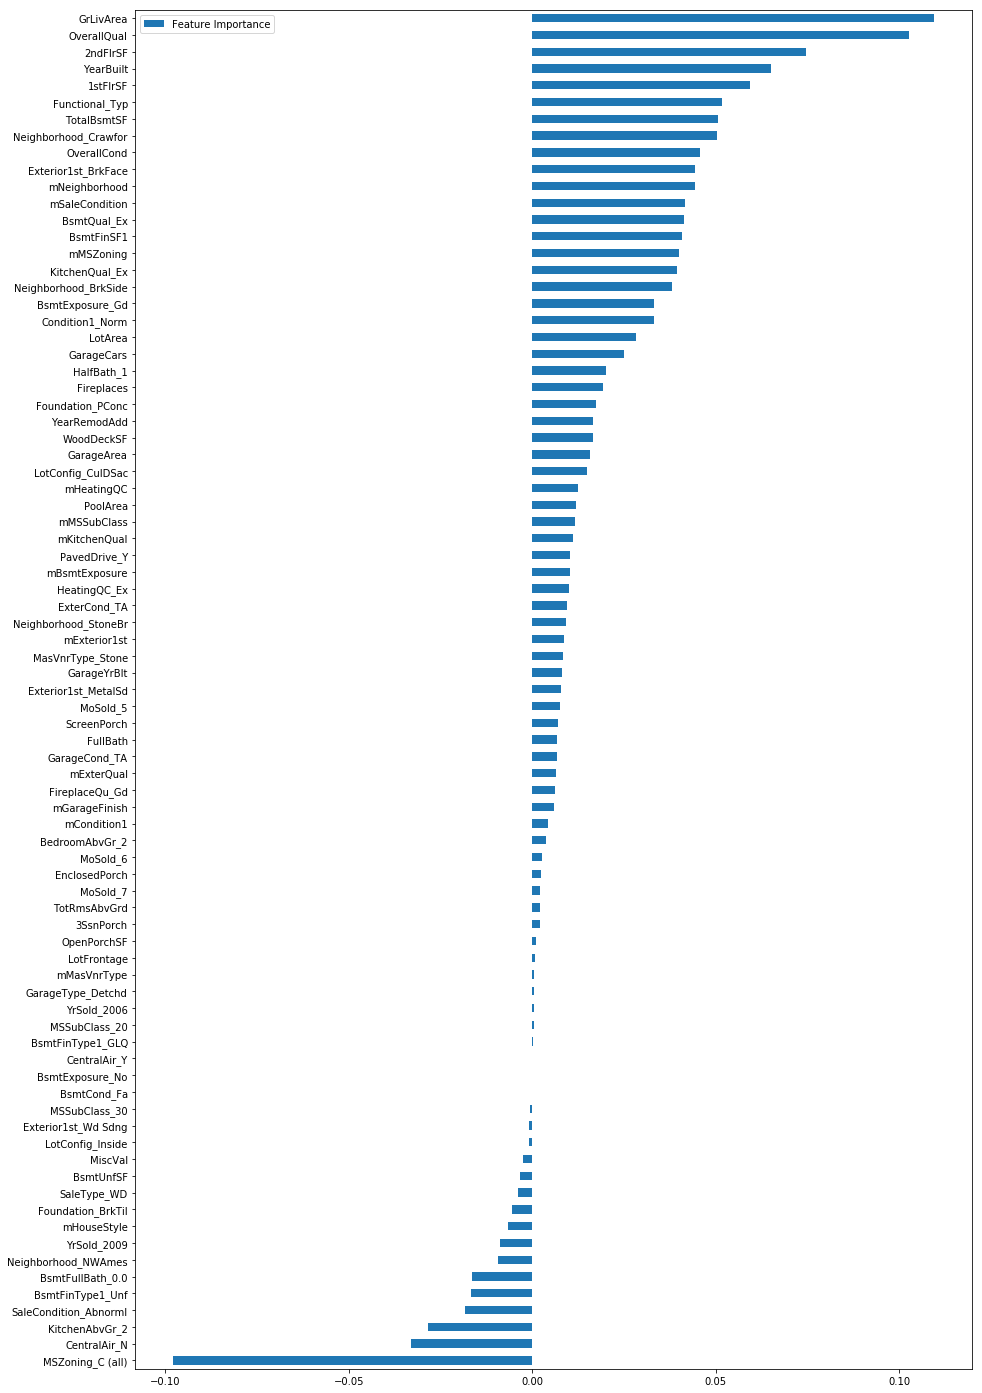

In [74]:
FI_lasso[FI_lasso['Feature Importance']!=0].sort_values("Feature Importance").plot(
kind = 'barh',figsize = (15,25))

In [76]:
FI_lasso.shape

(398, 1)

In [77]:
class add_feature(BaseEstimator, TransformerMixin):
    def __init__(self,additional=1):
        self.additional = additional
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        if self.additional==1:
            X["TotalHouse"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
            X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"]
            
        else:
            X["TotalHouse"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
            X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"]
            
            X["+_TotalHouse_OverallQual"] = X["TotalHouse"] * X["OverallQual"]
            X["+_GrLivArea_OverallQual"] = X["GrLivArea"] * X["OverallQual"]
            X["+_mMSZoning_TotalHouse"] = X["mMSZoning"] * X["TotalHouse"]
            X["+_mMSZoning_OverallQual"] = X["mMSZoning"] + X["OverallQual"]
            X["+_mMSZoning_YearBuilt"] = X["mMSZoning"] + X["YearBuilt"]
            X["+_mNeighborhood_TotalHouse"] = X["mNeighborhood"] * X["TotalHouse"]
            X["+_mNeighborhood_OverallQual"] = X["mNeighborhood"] + X["OverallQual"]
            X["+_mNeighborhood_YearBuilt"] = X["mNeighborhood"] + X["YearBuilt"]
            X["+_BsmtFinSF1_OverallQual"] = X["BsmtFinSF1"] * X["OverallQual"]
            
            X["-_mFunctional_TotalHouse"] = X["mFunctional"] * X["TotalHouse"]
            X["-_mFunctional_OverallQual"] = X["mFunctional"] + X["OverallQual"]
            X["-_LotArea_OverallQual"] = X["LotArea"] * X["OverallQual"]
            X["-_TotalHouse_LotArea"] = X["TotalHouse"] + X["LotArea"]
            X["-_mCondition1_TotalHouse"] = X["mCondition1"] * X["TotalHouse"]
            X["-_mCondition1_OverallQual"] = X["mCondition1"] + X["OverallQual"]
            
           
            X["Bsmt"] = X["BsmtFinSF1"] + X["BsmtFinSF2"] + X["BsmtUnfSF"]
            X["Rooms"] = X["FullBath"]+X["TotRmsAbvGrd"]
            X["PorchArea"] = X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]
            X["TotalPlace"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"] + X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]

    
            return X

In [78]:
pipe = Pipeline([
    ('labenc', LabelEnc()),
    ('add_feature', add_feature(additional=2)),
    ('skew_dummies', skew_dummies(skew=1)),
    ])

In [79]:
full_pipe = pipe.fit_transform(all_data)

In [80]:
n_train = train.shape[0]

X = full_pipe[:n_train]
test_X = full_pipe[n_train:]
y = SalePrice.SalePrice

X_scaled = scaler.fit(X).transform(X)
y_log = np.log1p(SalePrice.SalePrice)
test_X_scaled = scaler.transform(test_X)

In [81]:
#from sklearn.decomposition import PCA

In [82]:
#pca = PCA(n_components= 381)

In [83]:
#X_scaled = pca.fit_transform(X_scaled)
#test_X_scaled = pca.fit_transform(test_X_scaled)

n_train = train.shape[0]

X = all_data[:n_train]
test_X = all_data[n_train:]
y = SalePrice.SalePrice
y = np.log1p(y)

# Model Testing 

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV,ElasticNet,ElasticNetCV

In [85]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [86]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


In [87]:
X = X_scaled

In [88]:
y = y_log

In [89]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train = X
y_train = y
X_test = X
y_test = y

In [90]:
y_train.shape

(1458,)

## Kernel Ridge Regression

In [91]:
from sklearn.kernel_ridge import KernelRidge

In [92]:
KRR = KernelRidge(alpha = 0.6, kernel = 'polynomial', degree = 2, coef0= 2.5)

In [93]:
KRR.fit(X_train,y_train)

KernelRidge(alpha=0.6, coef0=2.5, degree=2, gamma=None, kernel='polynomial',
      kernel_params=None)

In [94]:
predictions = KRR.predict(X_test)

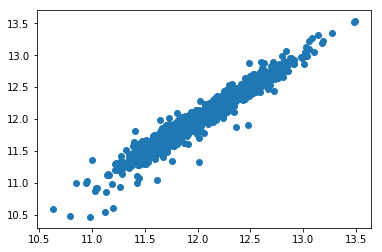

In [95]:
plt.scatter(predictions, y_test)

In [96]:
print('MAE:  ',mean_absolute_error(y_test,predictions))
print('MSE:  ',mean_squared_error(y_test,predictions))
print('RMSE:  ',np.sqrt(mean_squared_error(y_test,predictions)))

MAE:   0.0651215525559343
MSE:   0.008856049235410722
RMSE:   0.0941065844423796


## Linear Regression 

In [98]:
lm = LinearRegression()

In [99]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [100]:
predictions = lm.predict(X_test)

In [101]:
X_test.shape

(1458, 419)

Text(0.5, 0, 'predictions')

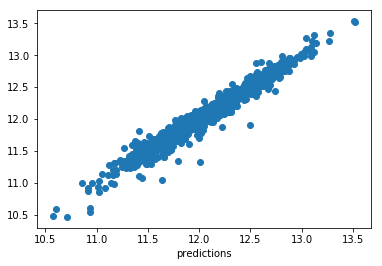

In [102]:
plt.scatter(predictions,y_test)
plt.xlabel("predictions")

In [99]:
print('MAE:  ',mean_absolute_error(y_test,predictions))
print('MSE:  ',mean_squared_error(y_test,predictions))
print('RMSE:  ',np.sqrt(mean_squared_error(y_test,predictions)))

MAE:   0.0585983231941964
MSE:   0.0071994342313999446
RMSE:   0.08484947985344368


## Lasso Linear Regression

In [104]:
lasso_cv = LassoCV(alphas = [0.0001,0.0005,0.001,0.01,0.1,1,10] )

In [105]:
lasso_cv.fit(X_train,y_train)

LassoCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
    cv='warn', eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100,
    n_jobs=None, normalize=False, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [106]:
np.exp(predictions)

array([202188.00828192, 194924.57086275, 217367.50850428, ...,
       292156.48955832, 145521.92294939, 144284.02227825])

In [107]:
lasso_cv.alpha_

0.001

In [108]:
lasso = Lasso(alpha = 0.0005)

In [109]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [110]:
predictions = lasso.predict(X_test)

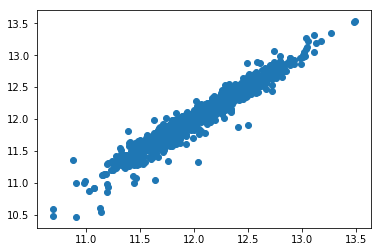

In [111]:
plt.scatter(predictions,y_test)

In [112]:
print('MAE:  ',mean_absolute_error(y_test,predictions))
print('MSE:  ',mean_squared_error(y_test,predictions))
print('RMSE:  ',np.sqrt(mean_squared_error(y_test,predictions)))

MAE:   0.06692419660772021
MSE:   0.009386421018599862
RMSE:   0.0968835435902293


##  Ridge Linear Regression

In [113]:
ridge_cv = RidgeCV(alphas=[0.0001,0.001,0.01,0.1,1,10])

In [114]:
ridge_cv.fit(X_train,y_train)

RidgeCV(alphas=array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [115]:
ridge_cv.alpha_

10.0

In [116]:
ridge = Ridge(alpha = 10)

In [117]:
ridge.fit(X_train,y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [118]:
predictions = ridge.predict(X_test)

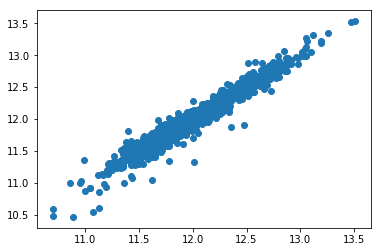

In [119]:
plt.scatter(predictions,y_test)

In [120]:
print('MAE:  ',mean_absolute_error(y_test,predictions))
print('MSE:  ',mean_squared_error(y_test,predictions))
print('RMSE:  ',np.sqrt(mean_squared_error(y_test,predictions)))

MAE:   0.06311480469164353
MSE:   0.008301234801119856
RMSE:   0.09111111239096939


In [121]:
y_train.shape

(1458,)

## ElasticNet Linear Regression 

In [122]:
ENet_cv = ElasticNetCV(alphas=[0.0001,0.001,0.01,0.1,1,10,100])

In [123]:
ENet_cv.fit(X_train,y_train)

ElasticNetCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100], copy_X=True,
       cv='warn', eps=0.001, fit_intercept=True, l1_ratio=0.5,
       max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [124]:
ENet_cv.alpha_

0.001

In [125]:
ENet = ElasticNet(alpha = 0.001, l1_ratio= 0.9, random_state = 3)

In [126]:
ENet.fit(X_train,y_train)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=3, selection='cyclic', tol=0.0001, warm_start=False)

In [127]:
predictions = ENet.predict(X_test)

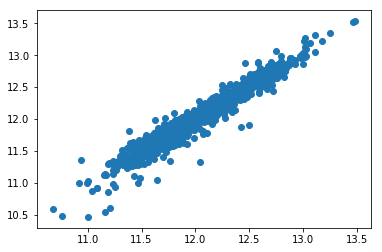

In [128]:
plt.scatter(predictions,y_test)

In [129]:
print('MAE:  ',mean_absolute_error(y_test,predictions))
print('MSE:  ',mean_squared_error(y_test,predictions))
print('RMSE:  ',np.sqrt(mean_squared_error(y_test,predictions)))

MAE:   0.06951366787920528
MSE:   0.010086762348717294
RMSE:   0.100432874840449


In [130]:
y_train.shape

(1458,)

# Gradient Boosting

In [131]:
from sklearn.ensemble import GradientBoostingRegressor

In [132]:
gbr = GradientBoostingRegressor(n_estimators=2000,learning_rate=0.05,max_depth= 4,
                               max_features='sqrt',min_samples_leaf = 15,min_samples_split=10,
                               loss = 'huber',random_state= 5)

In [133]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=4,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=2000,
             n_iter_no_change=None, presort='auto', random_state=5,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [134]:
predictions = gbr.predict(X_test)

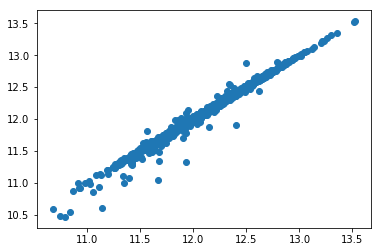

In [135]:
plt.scatter(predictions,y_test)

In [136]:
print('MAE:  ',mean_absolute_error(y_test,predictions))
print('MSE:  ',mean_squared_error(y_test,predictions))
print('RMSE:  ',np.sqrt(mean_squared_error(y_test,predictions)))

MAE:   0.021637898081336558
MSE:   0.002443445940492028
RMSE:   0.04943122434749141


In [137]:
y_train.shape

(1458,)

# SVR LINEARSVR 

In [138]:
from sklearn.svm import SVR, LinearSVR

In [139]:
svr = SVR(kernel ='poly',coef0 = 2.5)

In [140]:
Lsvr = LinearSVR()

In [141]:
svr.fit(X_train,y_train)
Lsvr.fit(X_train,y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [142]:
y_train.shape

(1458,)

In [143]:
predictions = svr.predict(X_test)

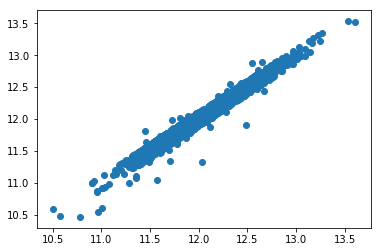

In [144]:
plt.scatter(predictions,y_test)

In [145]:
print('MAE:  ',mean_absolute_error(y_test,predictions))
print('MSE:  ',mean_squared_error(y_test,predictions))
print('RMSE:  ',np.sqrt(mean_squared_error(y_test,predictions)))

MAE:   0.06214249109152235
MSE:   0.006399768078520937
RMSE:   0.07999855047762389


In [146]:
predictions = Lsvr.predict(X_test)

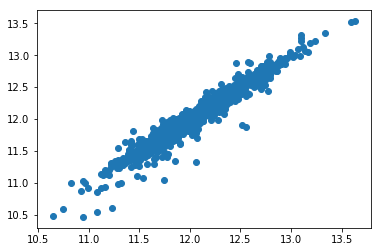

In [147]:
plt.scatter(predictions,y_test)

In [148]:
print('MAE:  ',mean_absolute_error(y_test,predictions))
print('MSE:  ',mean_squared_error(y_test,predictions))
print('RMSE:  ',np.sqrt(mean_squared_error(y_test,predictions)))

MAE:   0.06063139325991037
MSE:   0.009054884735601832
RMSE:   0.09515715808914131


# Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(n_estimators = 10)

In [ ]:
n_train = train.shape[0]

X = full_pipe[:n_train]
test_X = full_pipe[n_train:]
y = np.log(SalePrice.SalePrice)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
rfr.fit(X_train,(y_train*1000000).astype(int))

In [ ]:
predictions = rfr.predict(X_test)

In [ ]:
predictions = predictions/1000000

In [ ]:
plt.scatter(predictions,y_test)

In [ ]:
print('MAE:  ',mean_absolute_error(y_test,predictions))
print('MSE:  ',mean_squared_error(y_test,predictions))
print('RMSE:  ',np.sqrt(mean_squared_error(y_test,predictions)))

# Stacking Models

In [149]:
class AverageModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,models):
        self.models = models
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        for model in self.models_:
            model.fit(X,y)
        return self
    
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis =1)

In [150]:
averaged_models = AverageModels(models = (ENet, gbr, ridge, lasso, KRR))

In [151]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [154]:
averaged_models.fit(X_train,y_train)

AverageModels(models=(ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=3, selection='cyclic', tol=0.0001, warm_start=False), GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
  ...nelRidge(alpha=0.6, coef0=2.5, degree=2, gamma=None, kernel='polynomial',
      kernel_params=None)))

In [155]:
predictions = averaged_models.predict(X_test)

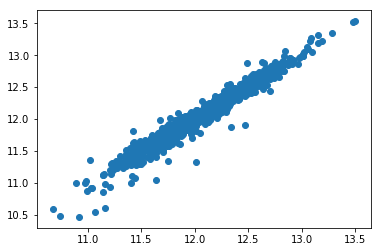

In [156]:
plt.scatter(predictions, y_test)

In [157]:
print('MAE:  ',mean_absolute_error(y_test,predictions))
print('MSE:  ',mean_squared_error(y_test,predictions))
print('RMSE:  ',np.sqrt(mean_squared_error(y_test,predictions)))

MAE:   0.055975246808550094
MSE:   0.007007609169628663
RMSE:   0.08371146378859148


In [158]:
score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1070 (0.0054)



In [161]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                
                instance.fit(X[train_index], np.array(y)[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [162]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, gbr, KRR, ridge),
                                                 meta_model = lasso)

In [163]:
score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1071 (0.0057)


In [164]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [166]:
stacked_averaged_models.fit(X_train, y_train)
stacked_train_pred = stacked_averaged_models.predict(X_train)
stacked_pred = np.expm1(stacked_averaged_models.predict(test_X_scaled))
print(rmsle(y_train, stacked_train_pred))

0.08340730596012462


In [167]:
del train,test,all_data,all_data2,data_pipe,full_pipe,X_scaled,y_log

In [168]:
import xgboost as xgb
import lightgbm as lgb

In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [ ]:
model_xgb.fit(X_train, y_train)
xgb_train_pred = model_xgb.predict(X_train)
xgb_pred = np.expm1(model_xgb.predict(test_X_scaled))
print(rmsle(y_train, xgb_train_pred))

In [169]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [ ]:
model_lgb.fit(X_train, y_train)
lgb_train_pred = model_lgb.predict(X_train)
lgb_pred = np.expm1(model_lgb.predict(test_X_scaled))
print(rmsle(y_train, lgb_train_pred))

In [ ]:
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

In [ ]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [ ]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)

In [226]:
test = pd.read_csv('test.csv')
Submission5 = pd.concat((pd.DataFrame({'Id':test['Id']})
        ,pd.DataFrame({'SalePrice':stacked_pred})),axis= 1)

In [228]:
Submission5.to_csv('Submission5.csv',index = False)